In [1]:
from classes.vocabulary import Vocabulary
from classes.word2vec import Word2Vec
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import re
from itertools import islice

In [2]:
path = './data/timemachine.txt'

with open(path, 'r', encoding='utf-8') as f:
    file = f.read().strip().lower().split('\n')

words = []
for line in file:
    words += line.split(' ')
    
w2v = Word2Vec(Vocabulary(path), dim=300, window_size=2, 
               lr=0.02, random_state=10, K=2, 
               distribute=True)
print(len(words))

55308


Cost epoch 10th:  83820.926
Cost epoch 20th:  81165.473
Cost epoch 30th:  81050.088
Cost epoch 40th:  80460.569
Cost epoch 50th:  80682.31


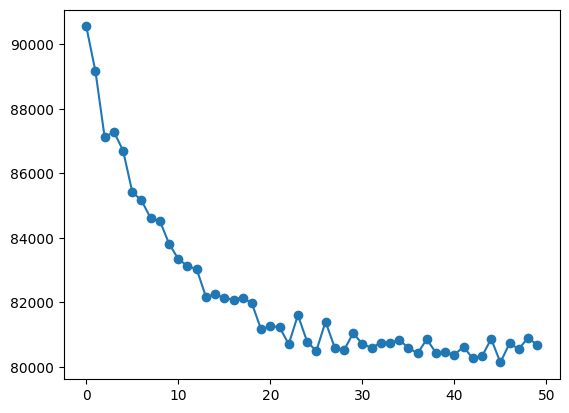

In [3]:
cost = []
max_words = 15_000
words = words[:max_words]

for j in range(50):
    total_loss = 0
    for i in range(w2v.window_size, len(words) - w2v.window_size):
        window = [words[i+j] for j in range(-w2v.window_size, w2v.window_size + 1) if j != 0]
        center_word = words[i]
        loss, n_s_i = w2v.forward(window, center_word)
        grads = w2v.backward(window, center_word, n_s_i)            
        w2v.update(grads)
        total_loss += loss 
    
    if not ((j + 1) % 10): print(f'Cost epoch {j+1}th: ', np.round(total_loss, decimals=3))
    cost.append(total_loss)

plt.plot(cost, '-o')
plt.show()

In [4]:
targets = [['travel', 'through'], ['travel', 'dimensions'], 
           ['lamp', 'edge'], ['found', 'where'], ['time']]

for target in targets:
    if isinstance(target, str):
        softmax = w2v.predict([target])
    else:
        softmax = w2v.predict(target)
        
    indexes = np.argsort(softmax)[-5:][::-1].astype(int)

    for index in indexes:
        print(softmax[index], w2v.vocabulary[index])

    probable_words = [w2v.vocabulary[index] for index in indexes]
    print(target)
    print(probable_words)
    print('-' * 100)
    print('')

0.05748964062502185 dimensions
0.03570977800689543 fierce
0.03103574154036213 even
0.02658710897006254 smile
0.026249529407425712 surgings
['travel', 'through']
['dimensions', 'fierce', 'even', 'smile', 'surgings']
----------------------------------------------------------------------------------------------------

0.0639683917032259 years
0.0547494300625098 wrong
0.038220313407760866 three
0.032541857030336595 dimensions
0.020082578095299793 eight
['travel', 'dimensions']
['years', 'wrong', 'three', 'dimensions', 'eight']
----------------------------------------------------------------------------------------------------

0.0049625071306585115 his
0.0038421210063016077 tried
0.003020024592853418 years
0.0028807842593802013 began
0.0028497350531939015 'i
['lamp', 'edge']
['his', 'tried', 'years', 'began', "'i"]
----------------------------------------------------------------------------------------------------

0.06167754908109521 these
0.02794376466249531 while
0.02664103292048799 jou

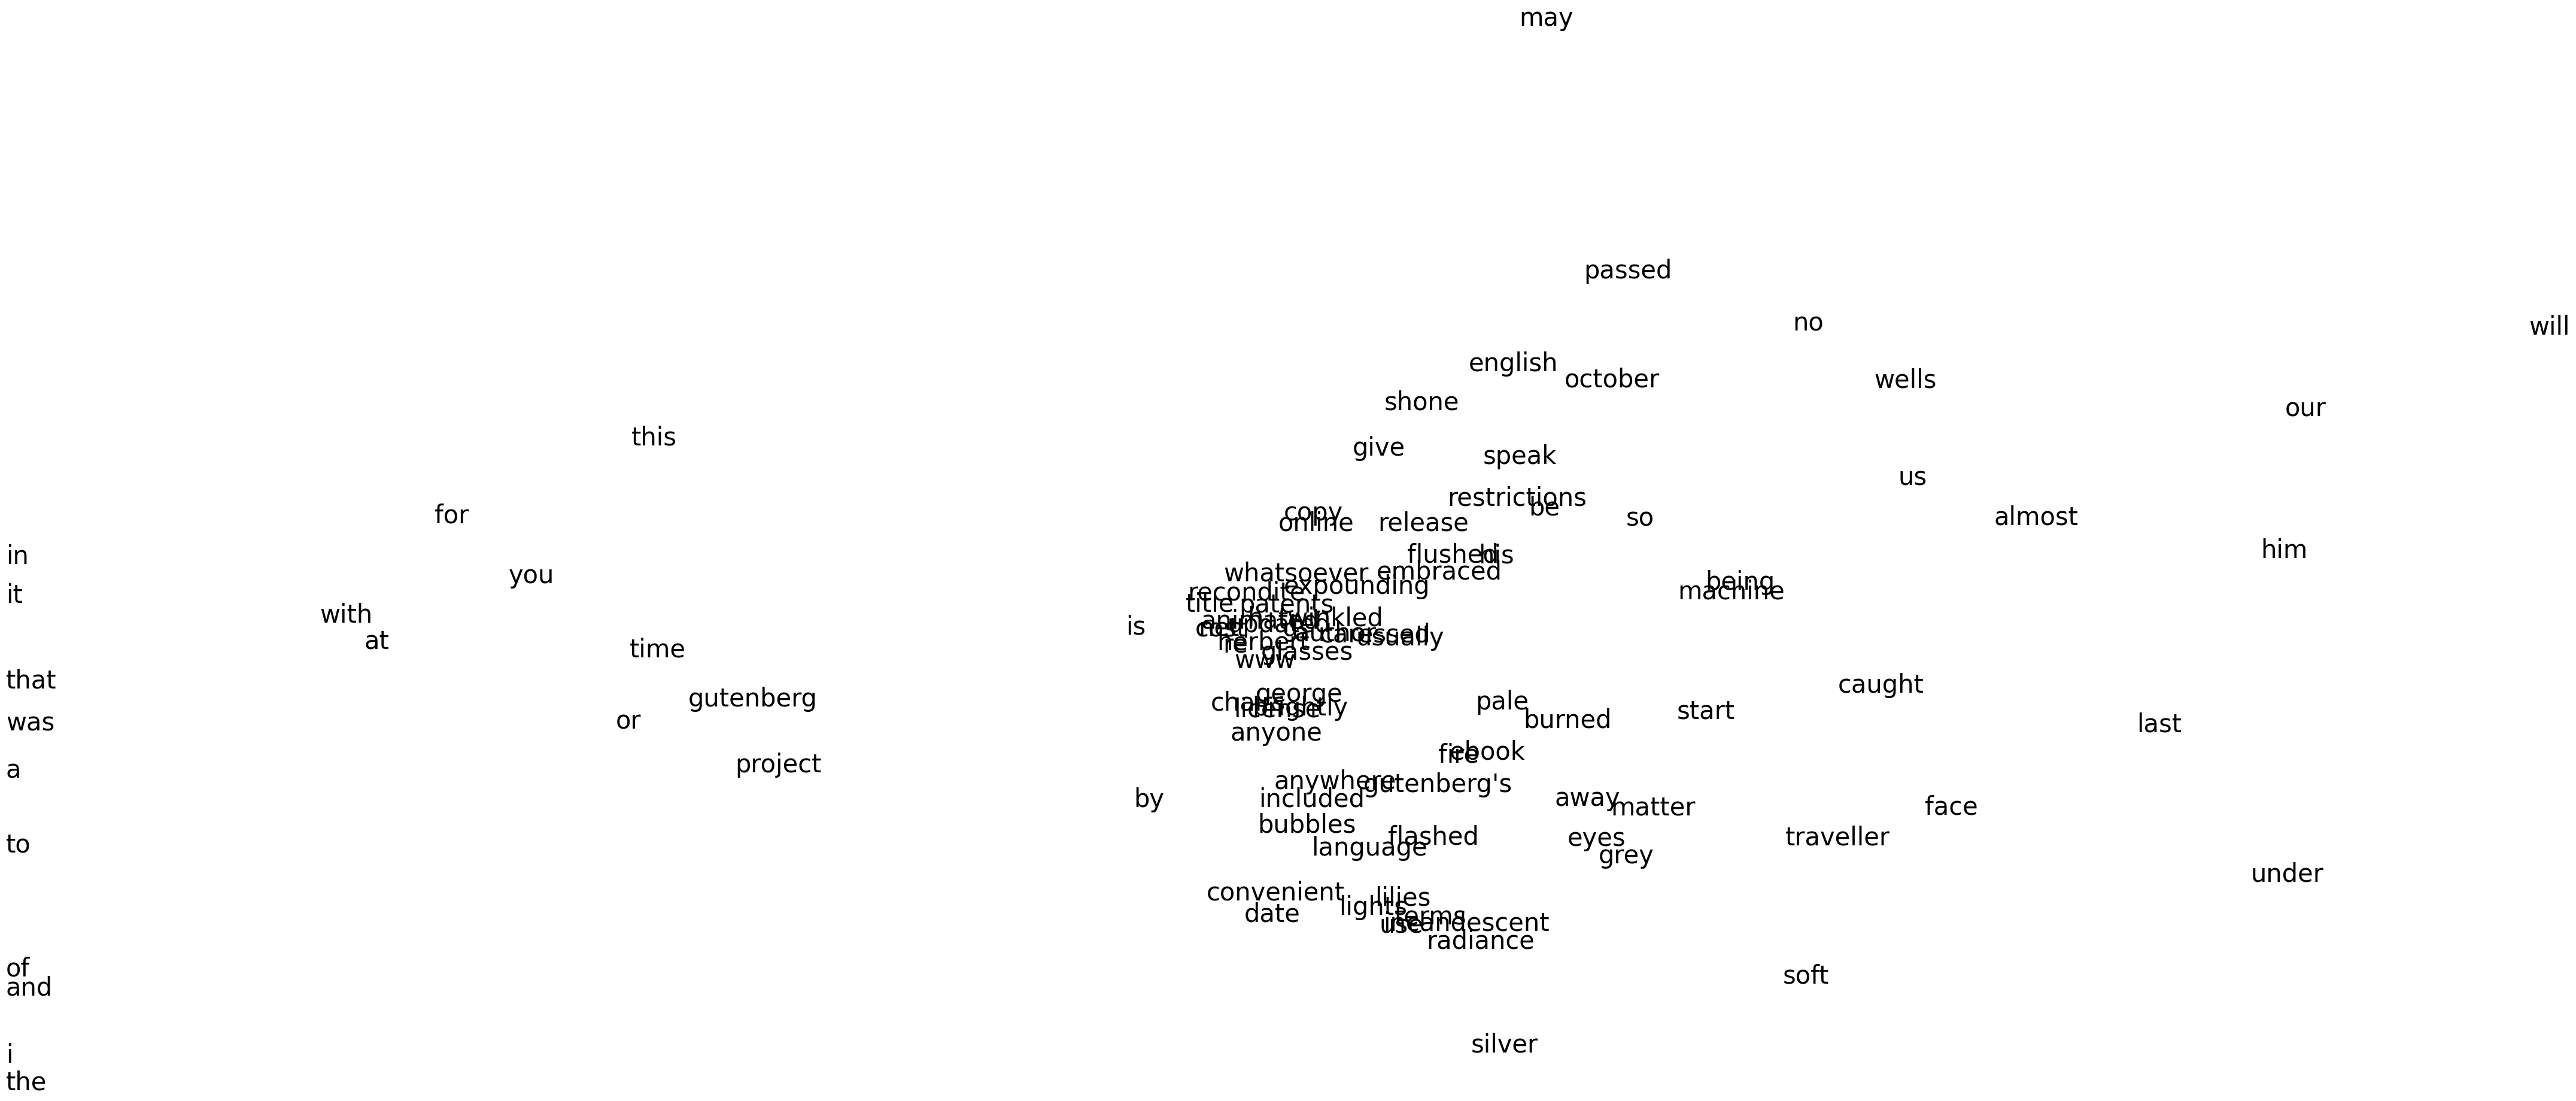

In [5]:
pca = PCA(n_components=2)
u_pca = pca.fit_transform(w2v.U.T)

text = [w2v.vocabulary.index_to_word[key] for key in np.arange(0, len(w2v.vocabulary)-1)]
text = text[:100]

u_pca_clip = np.clip(u_pca, -3.5, 3.5)

%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 6))
for i, (x, y) in enumerate(u_pca_clip):
    if i >= len(text):
        break
    else:
        ax.text(x, y, s=text[i], 
                 fontsize=30)

plt.axis('off')
plt.show()